A: 1.008
tau1 (µs): 29.490
tau2 (µs): 86.113
Fitted data saved to: Z:\Jacob\Material YbEr cluster\06122025 YbYb cluster\TRPL_rise_fit_output.csv


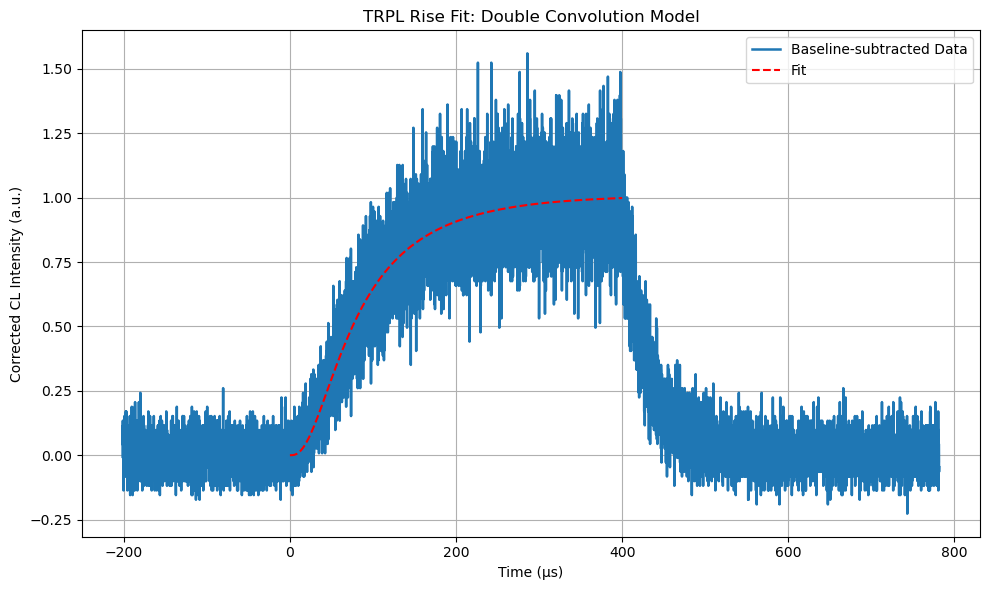

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

# === USER: Set your file path here ===
file_path = r"Z:\Jacob\Material YbEr cluster\06122025 YbYb cluster\TRPL_data_raw.csv"  # Update as needed
SkipRows_signal = 1

# Load the data
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file was not found at: {file_path}")
df = pd.read_csv(file_path, skiprows=SkipRows_signal)
signal = df.iloc[:, 0].to_numpy()
time = df.iloc[:, 1].to_numpy()

# Subtract baseline using the first 200 points
baseline = np.mean(signal[:200])
signal_corrected = signal - baseline

# Fit only within 0–400 µs
fit_mask = (time >= 0) & (time <= 400)
t_fit_data = time[fit_mask]
signal_fit_data = signal_corrected[fit_mask]

# Define the fit model
def double_convolution_model(t, A, tau1, tau2):
    return A * (1 - np.exp(-t / tau1))**2 * (1 - np.exp(-t / tau2))

# Initial parameter guesses
p0 = [1.0, 20.0, 80.0]

# Perform the fit
popt, pcov = curve_fit(double_convolution_model, t_fit_data, signal_fit_data, p0=p0)

# Print the fitted parameters
param_names = ["A", "tau1 (µs)", "tau2 (µs)"]
for name, val in zip(param_names, popt):
    print(f"{name}: {val:.3f}")

# Generate fitted signal over 0–400 µs with original time resolution
output_time = time[fit_mask]
fit_signal = double_convolution_model(output_time, *popt)

# Save output
output_df = pd.DataFrame({
    "Time (µs)": output_time,
    "Fitted CL Signal (a.u.)": fit_signal
})
output_csv_path = r"Z:\Jacob\Material YbEr cluster\06122025 YbYb cluster\TRPL_rise_fit_output.csv"
output_df.to_csv(output_csv_path, index=False)
print(f"Fitted data saved to: {output_csv_path}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, signal_corrected, label="Baseline-subtracted Data", lw=1.8)
plt.plot(output_time, fit_signal, '--r', label="Fit")
plt.xlabel("Time (µs)")
plt.ylabel("Corrected CL Intensity (a.u.)")
plt.title("TRPL Rise Fit: Double Convolution Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
